<a href="https://colab.research.google.com/github/alx1223/CKD/blob/main/ckd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
pip install pycaret[full]

Importing Libraries

In [198]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Data importing

In [199]:
ckd = pd.read_csv('Kidney-Disease.csv')

**Explotary Data Analysis**

plotting numerical columns as well as categorical columns

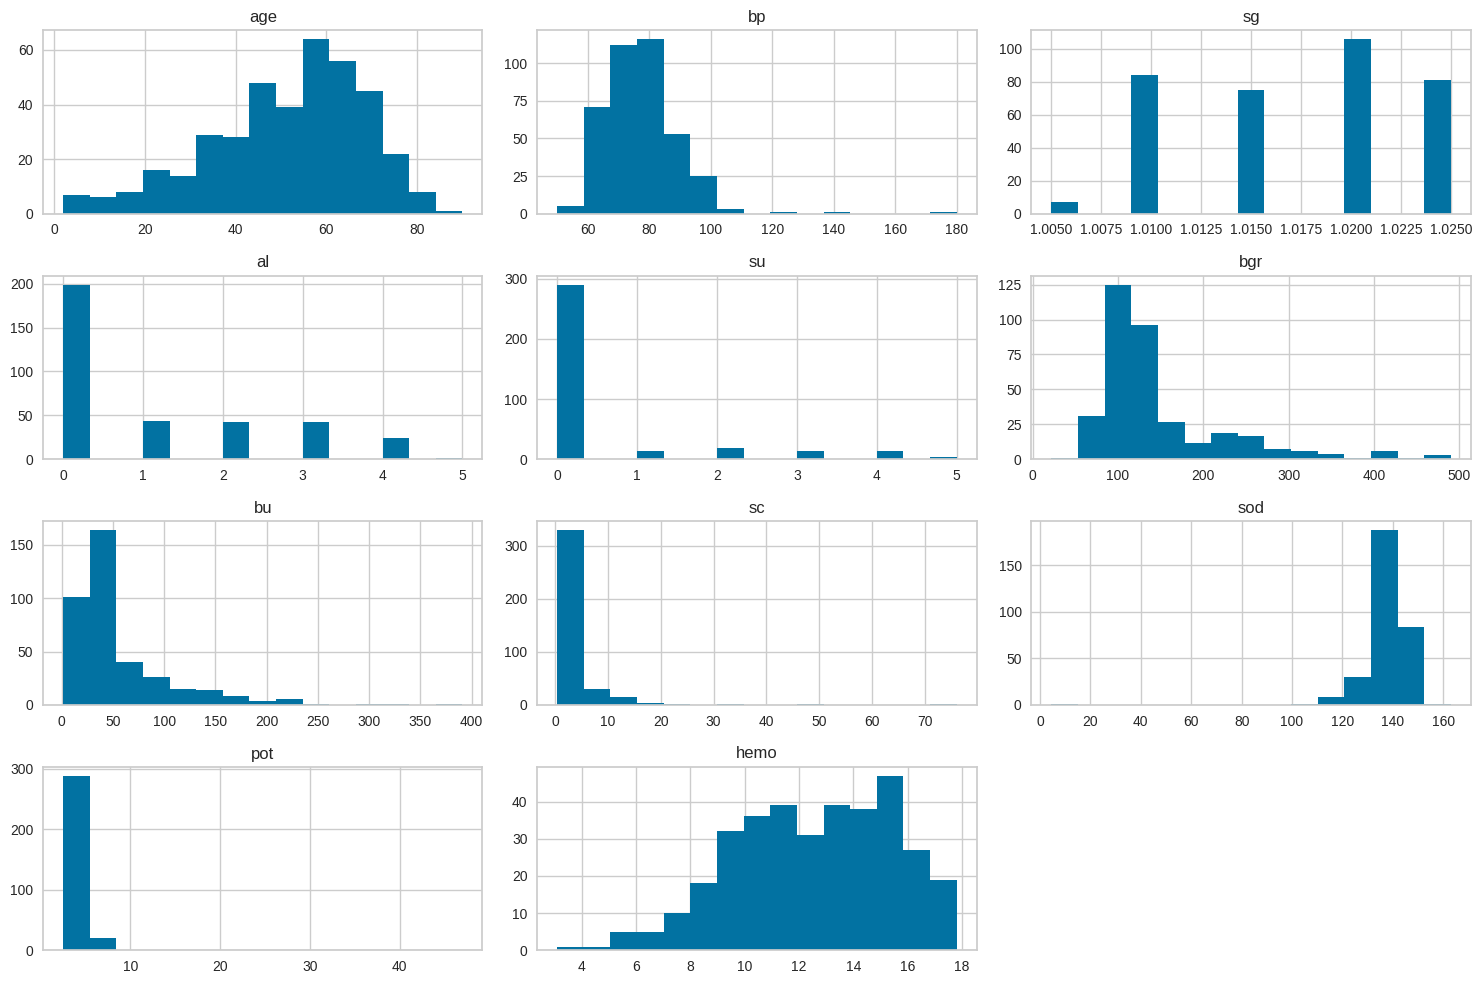

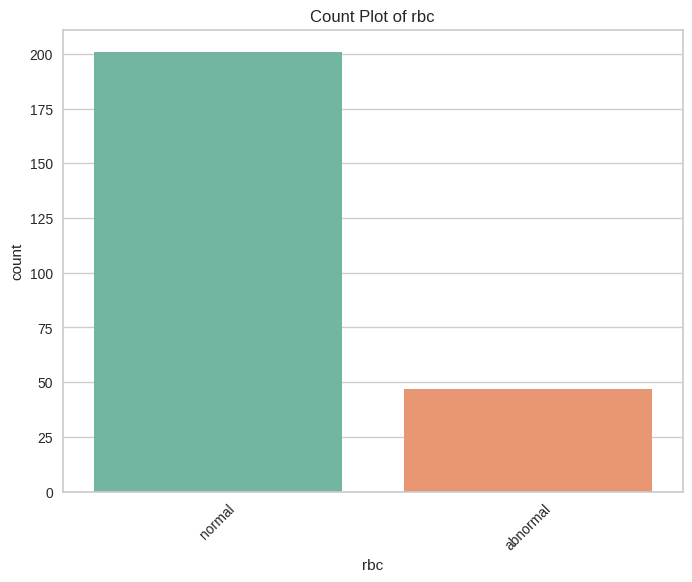

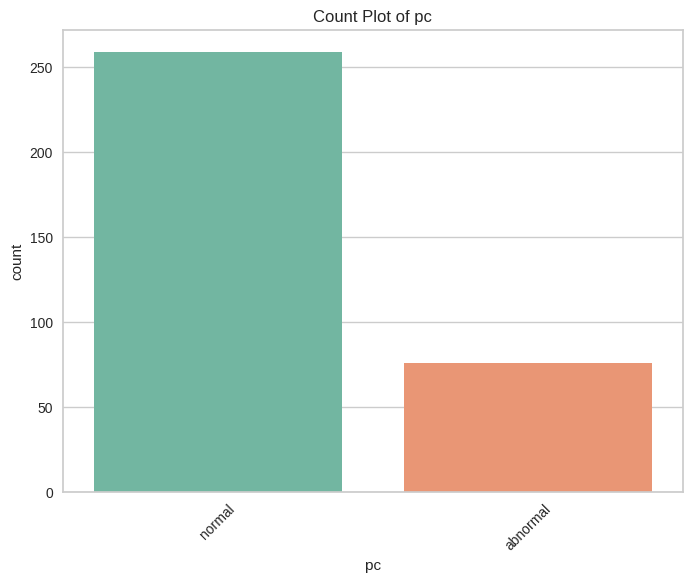

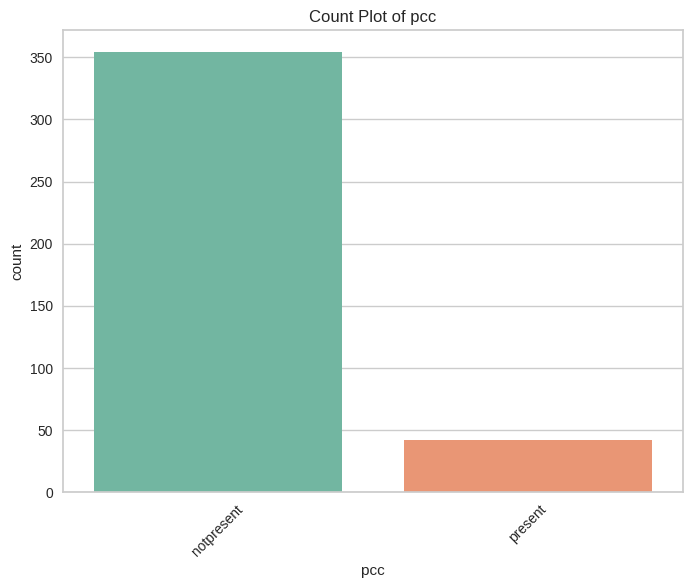

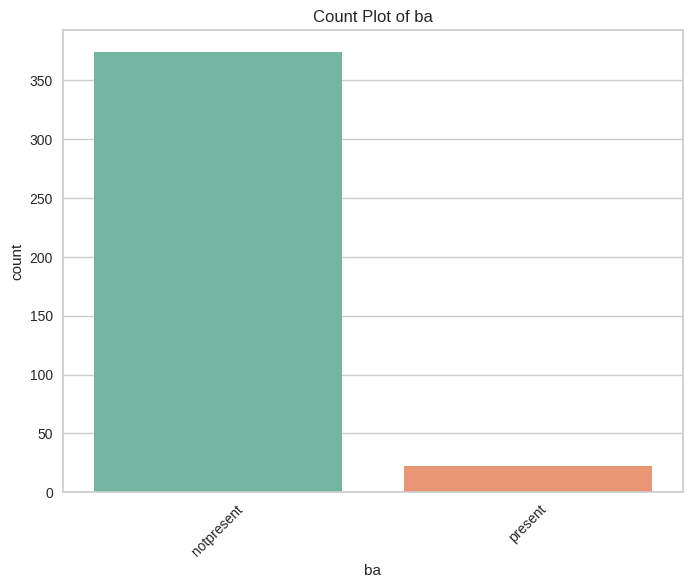

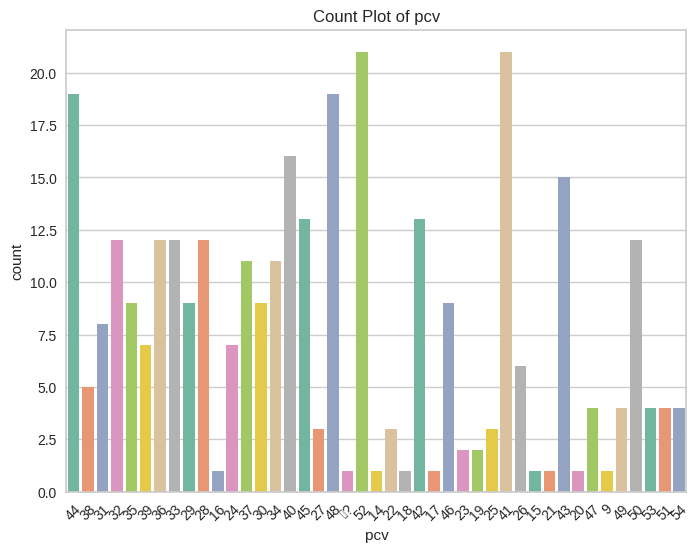

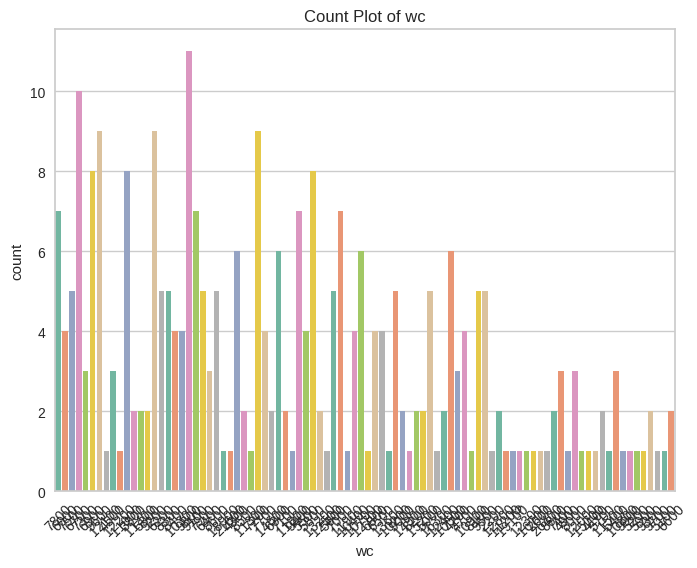

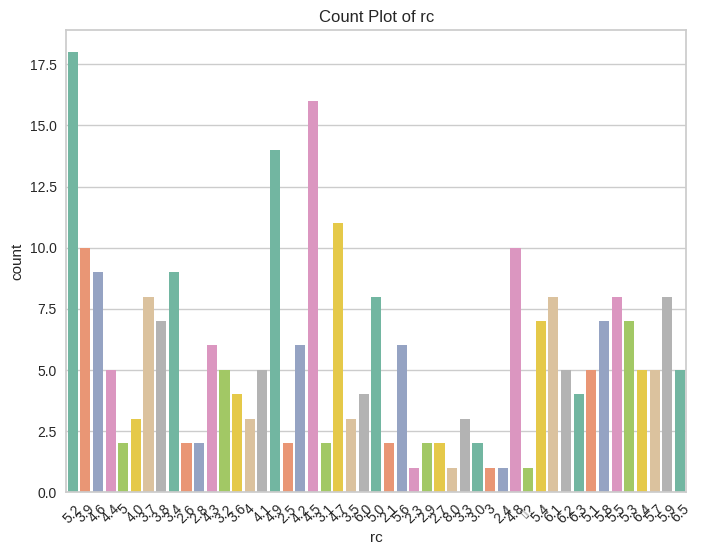

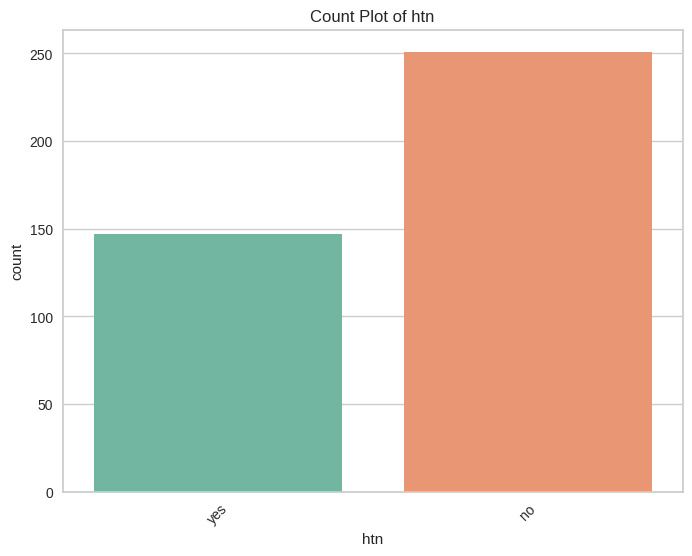

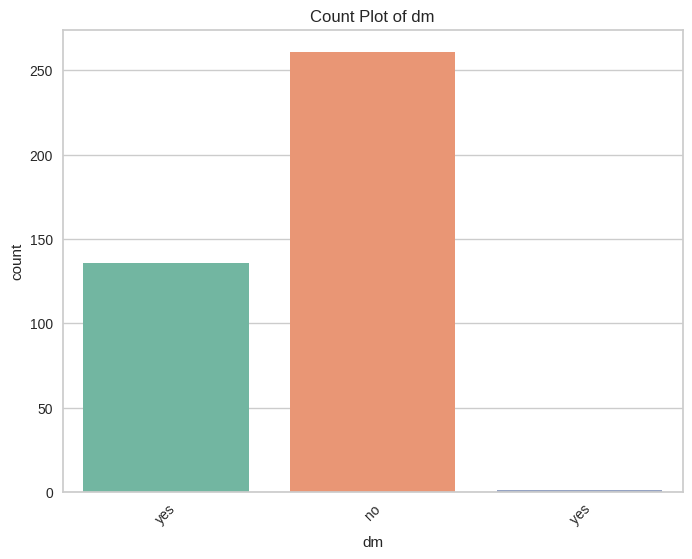

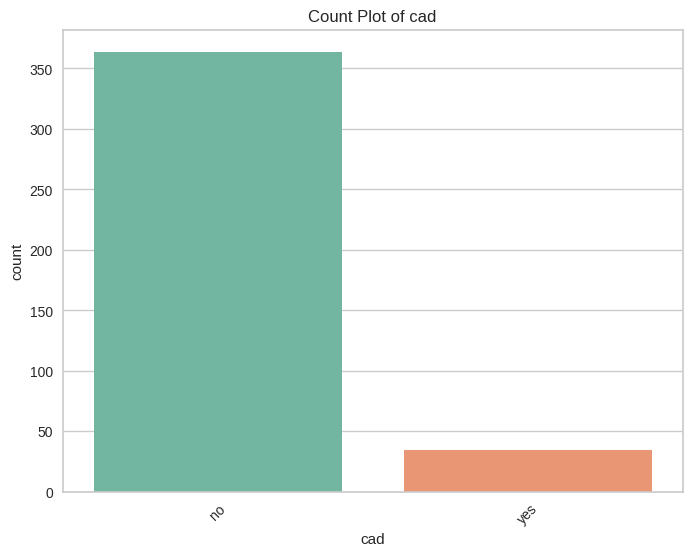

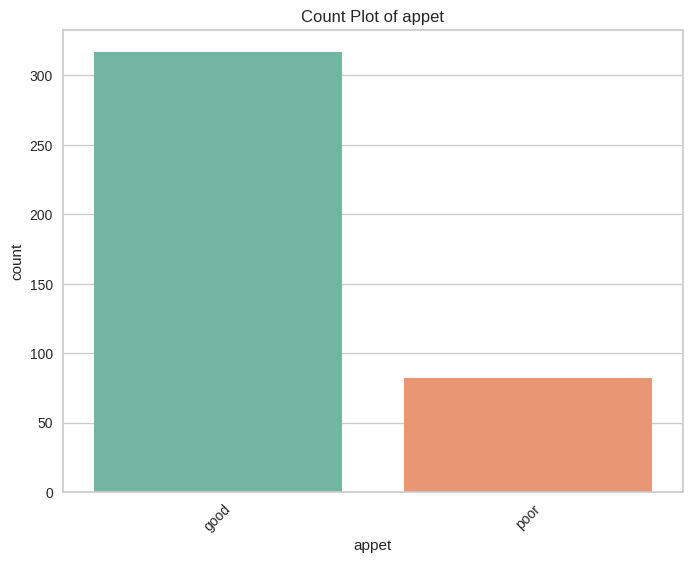

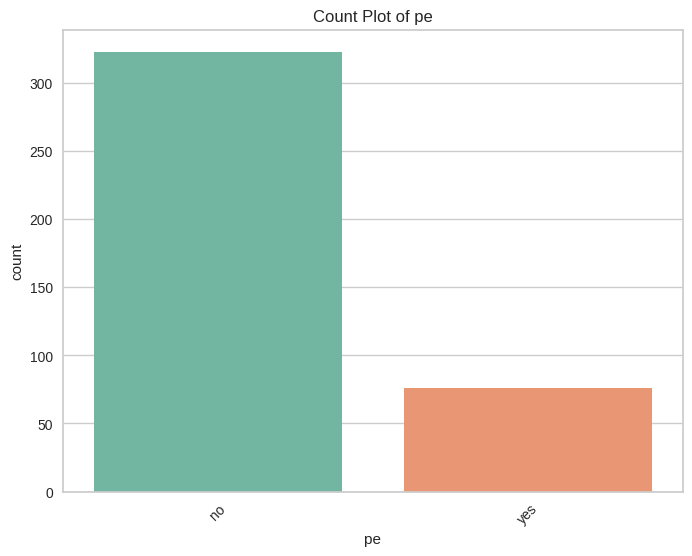

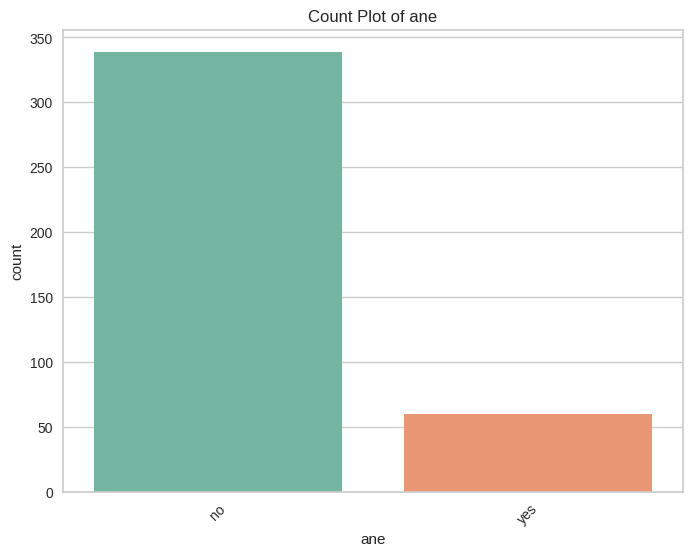

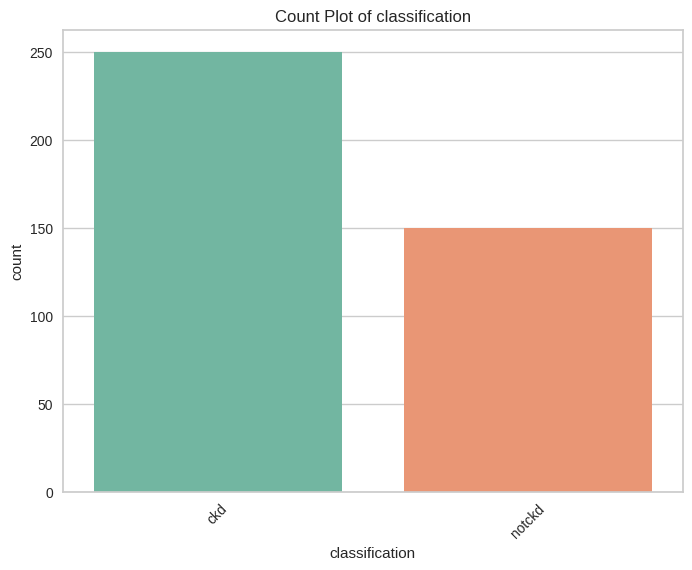

In [200]:
numerical_columns = ckd.select_dtypes(include=['float64']).columns
ckd[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

categorical_columns = ckd.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=ckd, palette="Set2")
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [201]:
ckd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [202]:
ckd.shape

(400, 26)

In [203]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Correlation Matrix

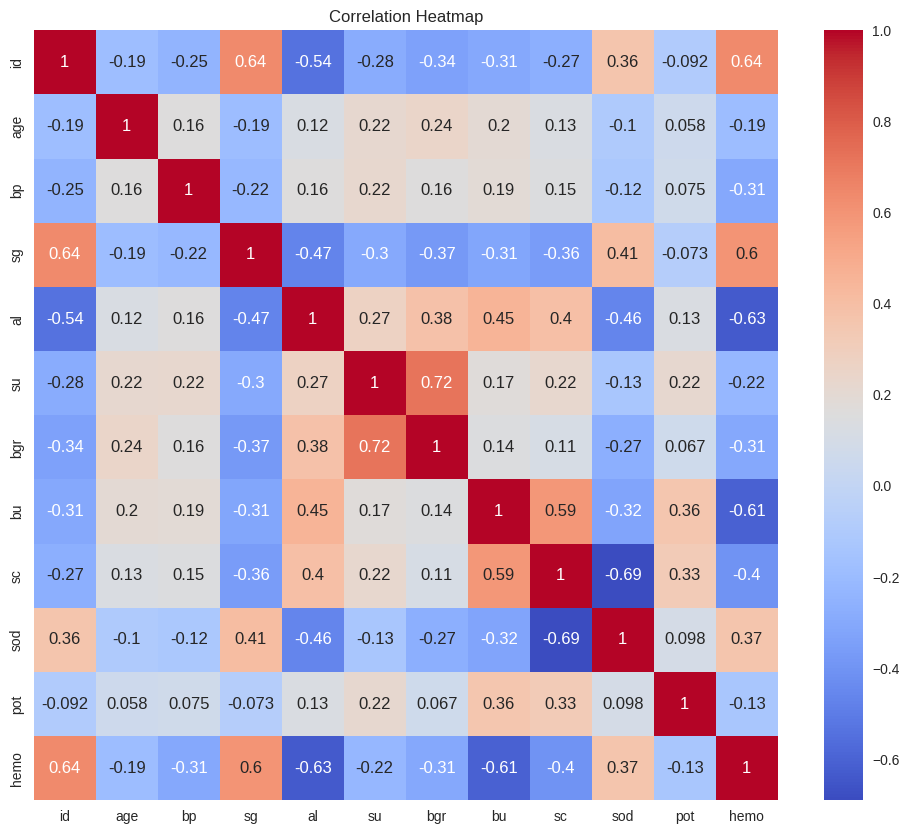

In [204]:
correlation_matrix = ckd.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Scatter plot of the most cporrelated attributes

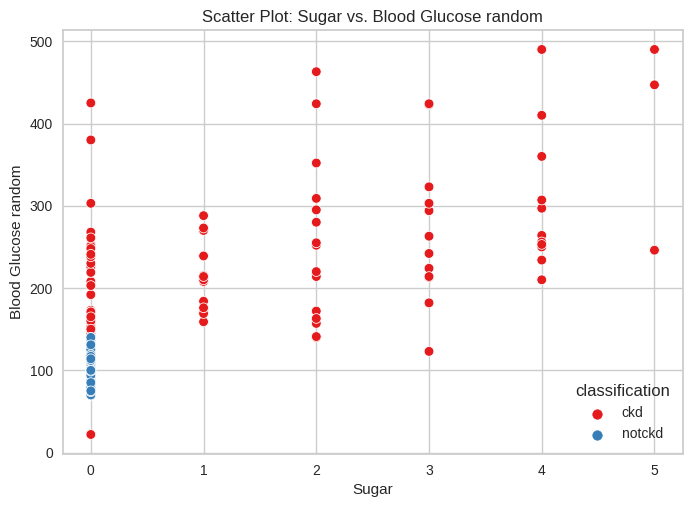

In [205]:
sns.scatterplot(x='su', y='bgr', data=ckd, hue='classification', palette='Set1')
plt.title("Scatter Plot: Sugar vs. Blood Glucose random")
plt.xlabel("Sugar")
plt.ylabel("Blood Glucose random")
plt.show()

Visualize the distribution of the target variable

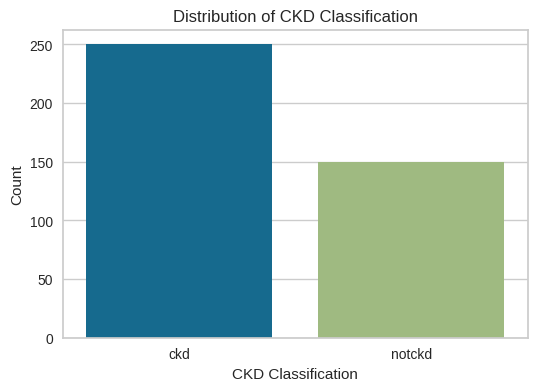

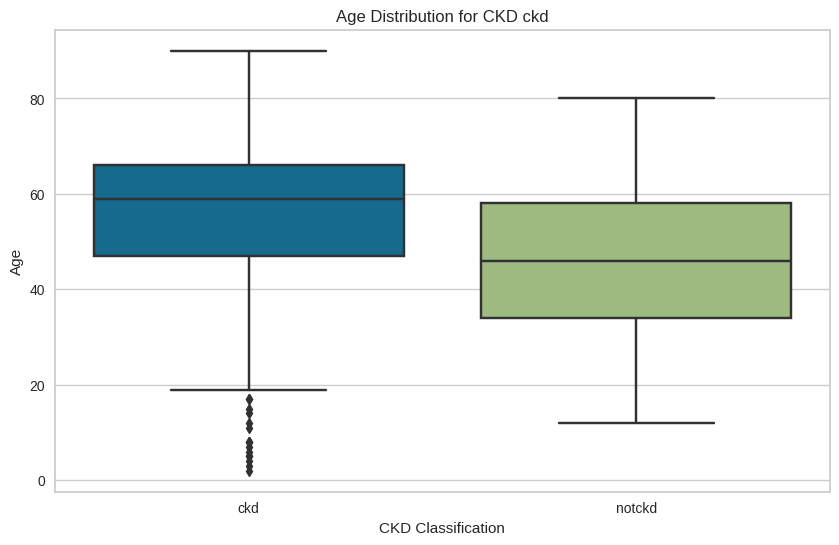

In [206]:
plt.figure(figsize=(6, 4))
sns.countplot(x='classification', data=ckd)
plt.title('Distribution of CKD Classification')
plt.xlabel('CKD Classification')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='age', data=ckd)
plt.title('Age Distribution for CKD ckd')
plt.xlabel('CKD Classification')
plt.ylabel('Age')
plt.show()

Calculate mean values of selected features for CKD cases

In [207]:
selected_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
mean_values_ckd = ckd[ckd['classification'] == 'ckd'][selected_features].mean()

print("Mean Values of Features for CKD Cases")
print("====================================")
for feature, mean_value in mean_values_ckd.iteritems():
    print(f"{feature.capitalize()}: {mean_value:.2f}")
print("====================================")

Mean Values of Features for CKD Cases
Age: 54.54
Bp: 79.62
Sg: 1.01
Al: 1.72
Su: 0.77
Bgr: 175.42
Bu: 72.39
Sc: 4.41
Sod: 133.90
Pot: 4.88
Hemo: 10.65


plots of risk factor

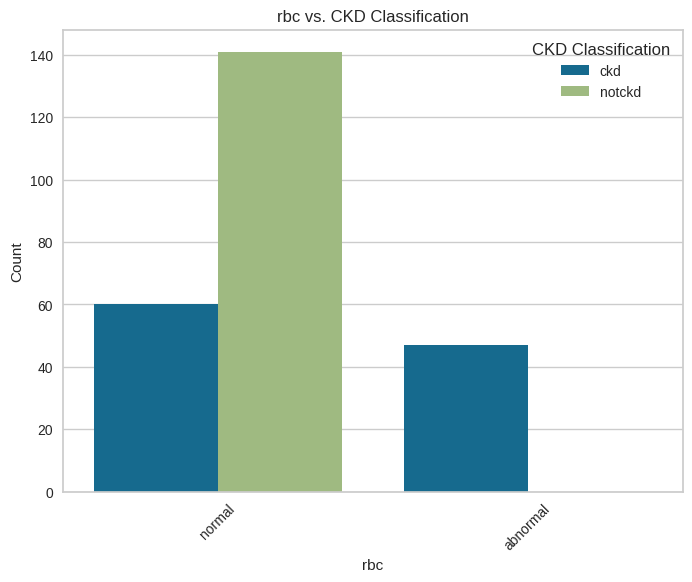

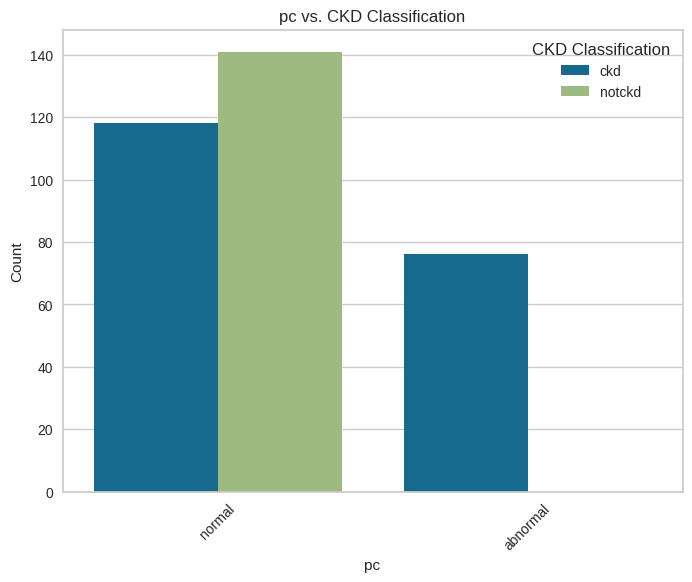

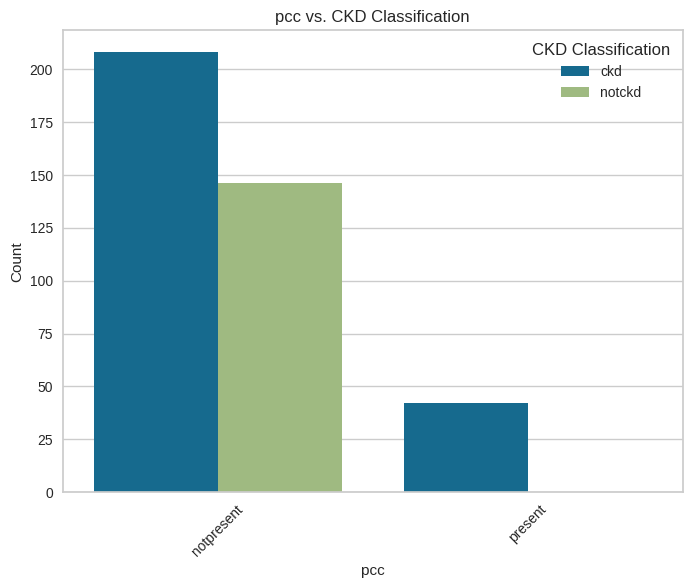

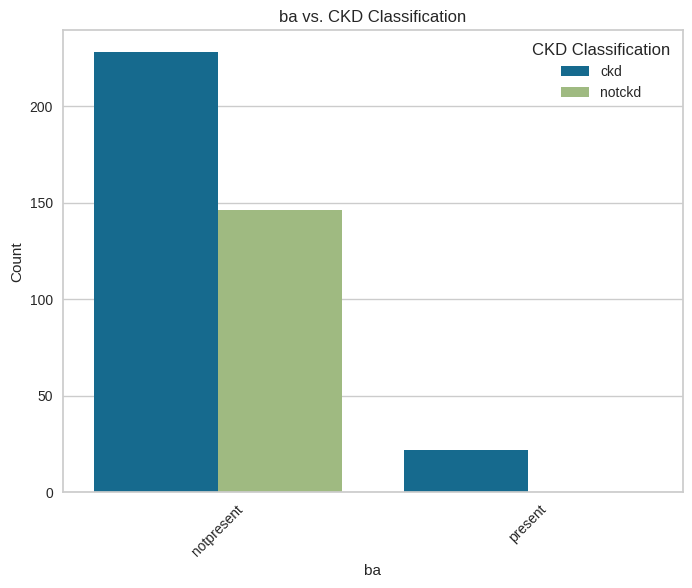

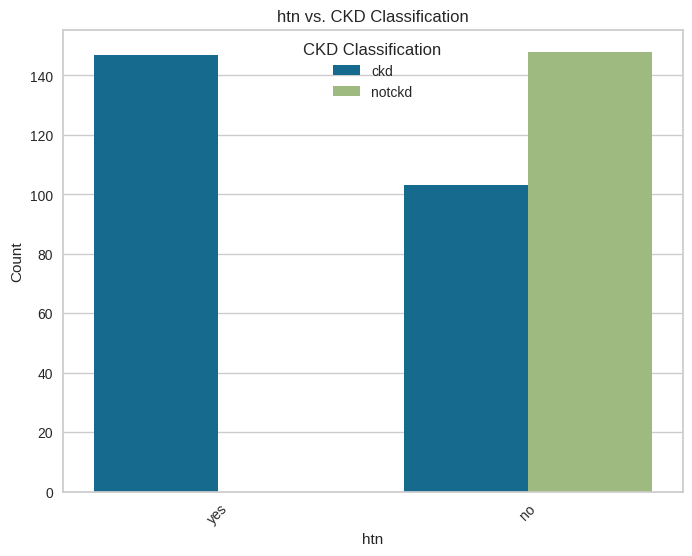

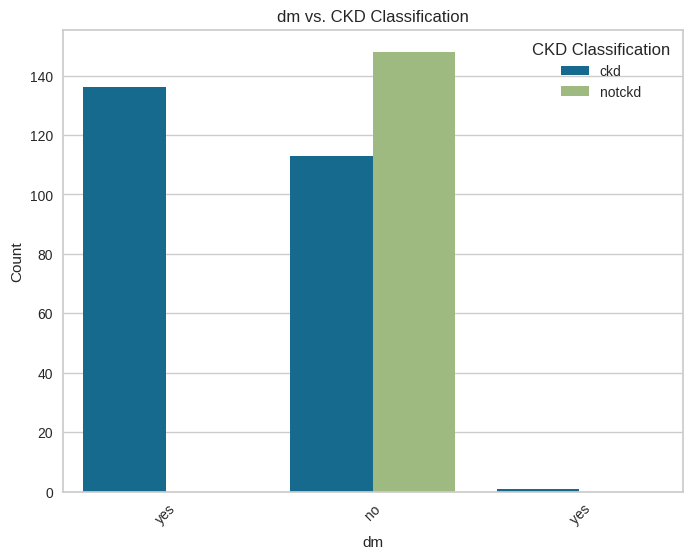

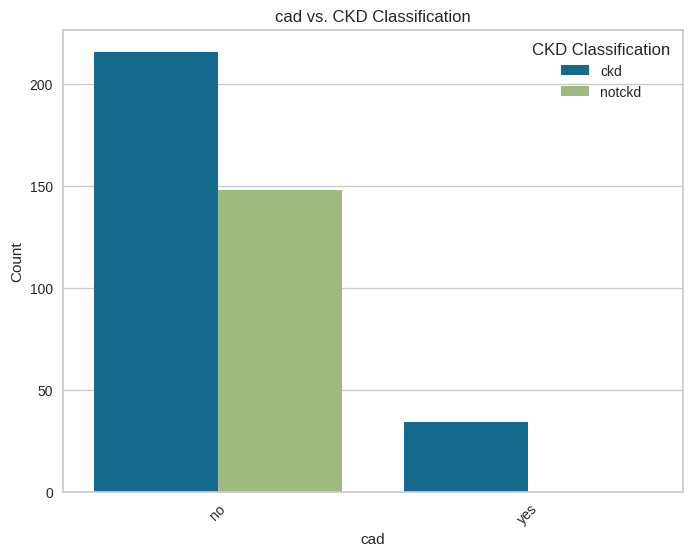

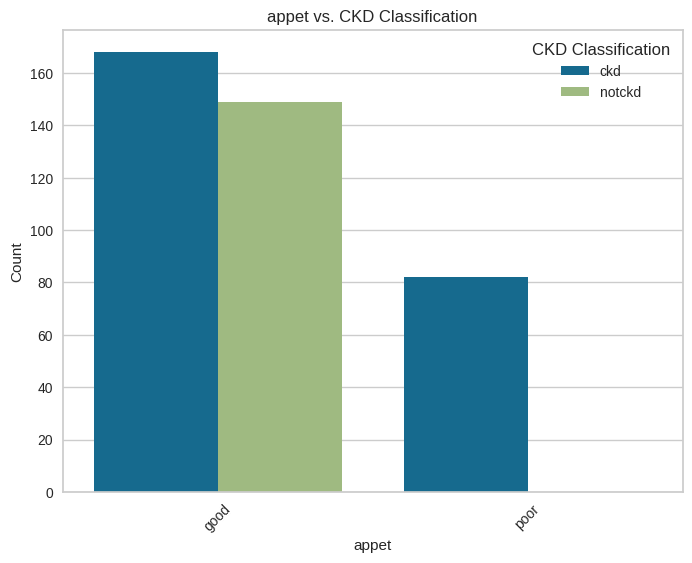

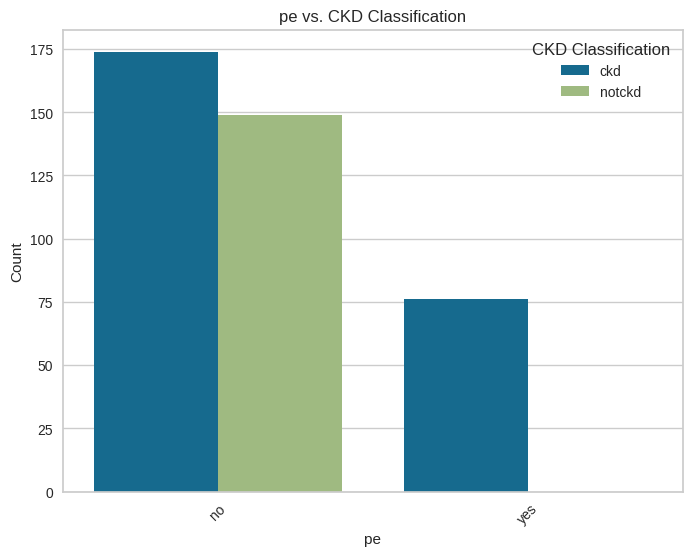

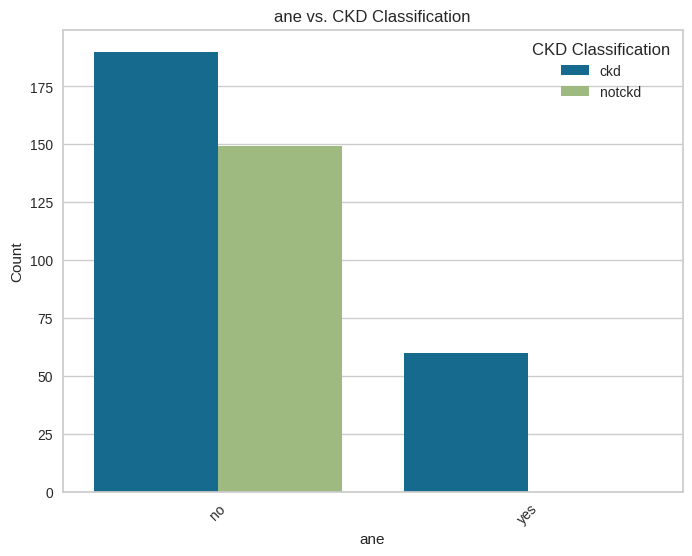

In [208]:
risk_factors = [
    'rbc', 'pc', 'pcc', 'ba',
    'htn', 'dm', 'cad', 'appet', 'pe', 'ane'
]
for factor in risk_factors:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=factor, hue='classification', data=ckd)
    plt.title(f'{factor} vs. CKD Classification')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='CKD Classification')
    plt.show()

Mapping Categorical Values to Corresponding Binary Representation

In [209]:
ckd['classification'] = ckd['classification'].apply(lambda x: 1 if x == 'ckd' else 0)
ckd['pcc'] = ckd['pcc'].apply(lambda x: 1 if x == 'present' else 0)
ckd['pc'] = ckd['pc'].apply(lambda x: 1 if x == 'abnormal' else 0)
ckd['ba'] = ckd['ba'].apply(lambda x: 1 if x == 'present' else 0)
ckd['htn'] = ckd['htn'].apply(lambda x: 1 if x == 'yes' else 0)
ckd['dm'] = ckd['dm'].apply(lambda x: 1 if x == 'yes' else 0)
ckd['cad'] = ckd['cad'].apply(lambda x: 1 if x == 'yes' else 0)
ckd['appet'] = ckd['appet'].apply(lambda x: 1 if x == 'poor' else 0)
ckd['pe'] = ckd['pe'].apply(lambda x: 1 if x == 'yes' else 0)
ckd['ane'] = ckd['ane'].apply(lambda x: 1 if x == 'yes' else 0)
ckd['pcv'] = ckd['pcv'].apply(lambda x: 1 if x == 'yes' else 0)

Checking the percentage of positive and negative cases

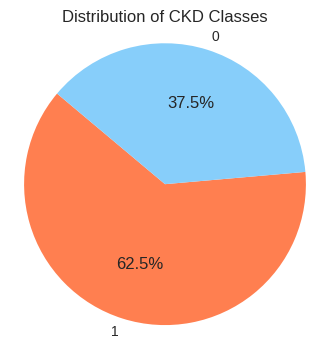

In [210]:
class_counts = ckd['classification'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['coral', 'lightskyblue'])
plt.title('Distribution of CKD Classes')
plt.axis('equal')
plt.show()

*the dataset is slighly imbalanced*

Finding percentage of null values in columns

In [211]:
null_percentages = (ckd.isnull().sum() / len(ckd)) * 100
null_percentage_ckd = pd.DataFrame({'Column': ckd.columns, 'Null Percentage': null_percentages})
print(null_percentage_ckd)

                        Column  Null Percentage
id                          id             0.00
age                        age             2.25
bp                          bp             3.00
sg                          sg            11.75
al                          al            11.50
su                          su            12.25
rbc                        rbc            38.00
pc                          pc             0.00
pcc                        pcc             0.00
ba                          ba             0.00
bgr                        bgr            11.00
bu                          bu             4.75
sc                          sc             4.25
sod                        sod            21.75
pot                        pot            22.00
hemo                      hemo            13.00
pcv                        pcv             0.00
wc                          wc            26.25
rc                          rc            32.50
htn                        htn          

Filling value with ,mean and mode

In [212]:
high_missing_cols = ["id","rbc", "wc", "rc"]
ckd.drop(columns=high_missing_cols, inplace=True)
columns_to_fill = ["age","bp","sg","al","su","bgr", "bu", "sc", "sod", "pot", "hemo", "pcv"]
column_averages = ckd[columns_to_fill].mean()

ckd[columns_to_fill] = ckd[columns_to_fill].fillna(column_averages)
columns_to_fill_mode = ["pcv","htn", "dm", "cad", "appet", "pe", "ane"]
for col in columns_to_fill_mode:
    mode_val = ckd[col].mode()[0]
    ckd[col].fillna(mode_val, inplace=True)
print(ckd)

      age    bp     sg   al   su  pc  pcc  ba         bgr    bu  ...  \
0    48.0  80.0  1.020  1.0  0.0   0    0   0  121.000000  36.0  ...   
1     7.0  50.0  1.020  4.0  0.0   0    0   0  148.036517  18.0  ...   
2    62.0  80.0  1.010  2.0  3.0   0    0   0  423.000000  53.0  ...   
3    48.0  70.0  1.005  4.0  0.0   1    1   0  117.000000  56.0  ...   
4    51.0  80.0  1.010  2.0  0.0   0    0   0  106.000000  26.0  ...   
..    ...   ...    ...  ...  ...  ..  ...  ..         ...   ...  ...   
395  55.0  80.0  1.020  0.0  0.0   0    0   0  140.000000  49.0  ...   
396  42.0  70.0  1.025  0.0  0.0   0    0   0   75.000000  31.0  ...   
397  12.0  80.0  1.020  0.0  0.0   0    0   0  100.000000  26.0  ...   
398  17.0  60.0  1.025  0.0  0.0   0    0   0  114.000000  50.0  ...   
399  58.0  80.0  1.025  0.0  0.0   0    0   0  131.000000  18.0  ...   

          pot  hemo  pcv  htn  dm  cad  appet  pe  ane  classification  
0    4.627244  15.4    0    1   1    0      0   0    0        

In [213]:
ckd.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [214]:
ckd.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,121.000000,36.0,...,4.627244,15.4,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,148.036517,18.0,...,4.627244,11.3,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,423.000000,53.0,...,4.627244,9.6,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,1,0,117.000000,56.0,...,2.500000,11.2,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,106.000000,26.0,...,4.627244,11.6,0,0,0,0,0,0,0,1


In [215]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              400 non-null    int64  
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    int64  
 15  htn             400 non-null    int64  
 16  dm              400 non-null    int64  
 17  cad             400 non-null    int

Applying SMOTE

In [216]:

X = ckd.drop('classification', axis=1)
y = ckd['classification']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_ckd = pd.DataFrame(X_resampled, columns=X.columns)
resampled_ckd['classification'] = y_resampled

Checking the percentage of positive and negative cases after applying SMOTE

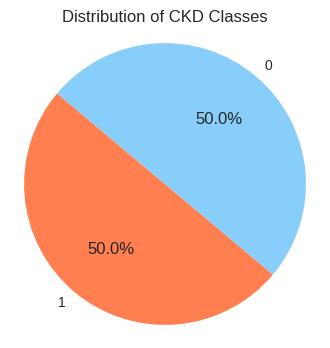

In [217]:
class_counts = resampled_ckd['classification'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['coral', 'lightskyblue'])
plt.title('Distribution of CKD Classes')
plt.axis('equal')

plt.show()


Counting the number values in each column after applying SMOTE

In [218]:
resampled_ckd.count()

age               500
bp                500
sg                500
al                500
su                500
pc                500
pcc               500
ba                500
bgr               500
bu                500
sc                500
sod               500
pot               500
hemo              500
pcv               500
htn               500
dm                500
cad               500
appet             500
pe                500
ane               500
classification    500
dtype: int64

In [219]:
resampled_ckd.shape

(500, 22)

Initilizing setup for pycaret

In [220]:
from pycaret.classification import *
s = setup(data = resampled_ckd, target = 'classification', session_id=101)

,Description,Value
0,Session id,101
1,Target,classification
2,Target type,Binary
3,Original data shape,"(500, 22)"
4,Transformed data shape,"(500, 22)"
5,Transformed train set shape,"(350, 22)"
6,Transformed test set shape,"(150, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


Finding the best model

In [221]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9971,1.0000,0.9944,1.0000,0.9971,0.9943,0.9944,0.4860
gbc,Gradient Boosting Classifier,0.9914,0.9997,0.9833,1.0000,0.9914,0.9829,0.9833,0.1800
et,Extra Trees Classifier,0.9914,1.0000,0.9833,1.0000,0.9914,0.9829,0.9833,0.3090
catboost,CatBoost Classifier,0.9914,0.9997,0.9833,1.0000,0.9914,0.9829,0.9833,0.1500
lightgbm,Light Gradient Boosting Machine,0.9886,0.9990,0.9775,1.0000,0.9884,0.9771,0.9778,0.1460
xgboost,Extreme Gradient Boosting,0.9857,0.9993,0.9778,0.9944,0.9855,0.9715,0.9725,0.1550
ada,Ada Boost Classifier,0.9829,0.9993,0.9660,1.0000,0.9822,0.9657,0.9672,0.3110
lr,Logistic Regression,0.9743,0.9990,0.9601,0.9892,0.9738,0.9486,0.9502,0.9570
nb,Naive Bayes,0.9686,0.9990,0.9373,1.0000,0.9670,0.9371,0.9399,0.1150
dt,Decision Tree Classifier,0.9686,0.9690,0.9605,0.9771,0.9684,0.9371,0.9379,0.0770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

**Machine Learning**

importing libraries

In [222]:
pip install catboost

In [223]:
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Random Forest

In [239]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-Score: 0.99
ROC AUC: 0.99
Confusion Matrix:
 [[54  0]
 [ 1 45]]


Confusion matrix in percentage

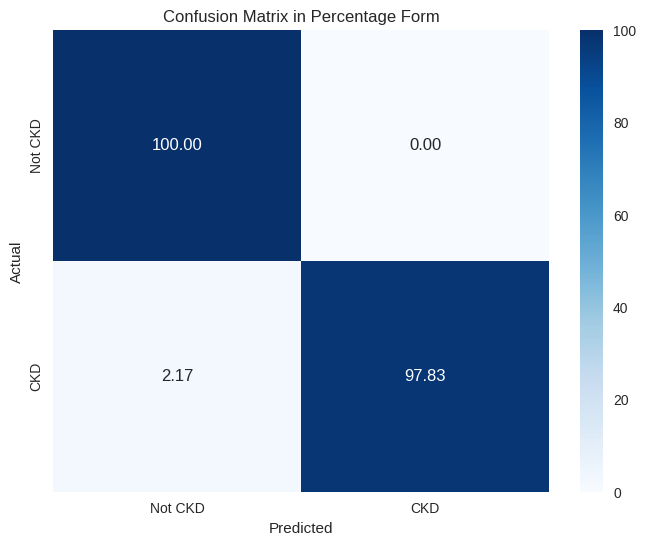

In [240]:
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

Cross validating using K-Fold

In [244]:
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_classifier.fit(X_train, y_train)
    y_pred = random_forest_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)


mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1 = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1-Score: {mean_f1:.2f}")
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")

Mean Accuracy: 0.99
Mean Precision: 0.99
Mean Recall: 0.99
Mean F1-Score: 0.99
Mean ROC AUC: 0.99


Cross validation plot

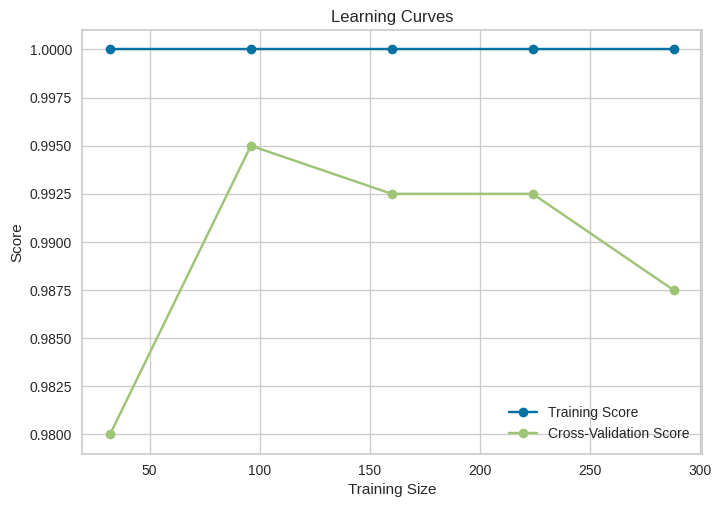

In [246]:
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curves")
plt.show()

Catboost

In [228]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
catboost_classifier = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42)
catboost_classifier.fit(X_train_resampled, y_train_resampled, verbose=100)
y_pred = catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"CatBoost Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)


0:	learn: 0.5163132	total: 9.81ms	remaining: 9.8s
100:	learn: 0.0025080	total: 751ms	remaining: 6.68s
200:	learn: 0.0012152	total: 1.25s	remaining: 4.97s
300:	learn: 0.0010525	total: 1.63s	remaining: 3.79s
400:	learn: 0.0009909	total: 1.97s	remaining: 2.94s
500:	learn: 0.0009689	total: 2.36s	remaining: 2.35s
600:	learn: 0.0009496	total: 2.78s	remaining: 1.85s
700:	learn: 0.0009364	total: 3.17s	remaining: 1.35s
800:	learn: 0.0009259	total: 3.55s	remaining: 882ms
900:	learn: 0.0009174	total: 3.92s	remaining: 431ms
999:	learn: 0.0009064	total: 4.37s	remaining: 0us
CatBoost Accuracy: 0.98
Precision: 1.00
Recall: 0.96
F1-Score: 0.98
ROC AUC: 0.98
Confusion Matrix:
 [[54  0]
 [ 2 44]]


Confusion matrix in percentage

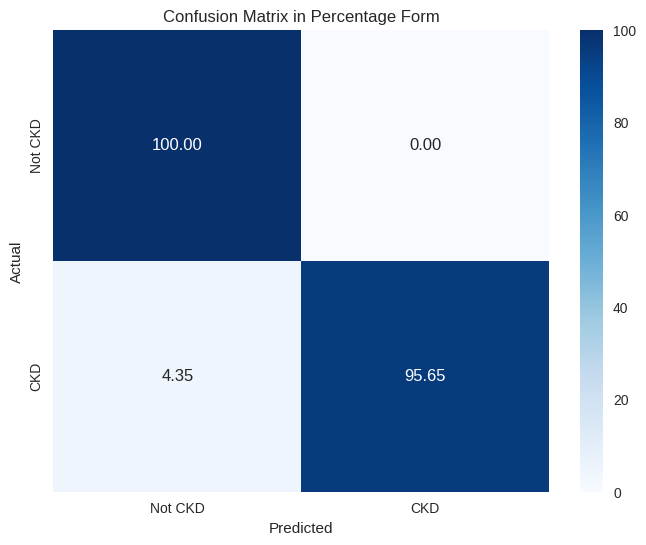

In [229]:
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

Gradient Boosting Classifier

In [230]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = gradient_boosting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Gradient Boosting Accuracy: 0.98
Precision: 1.00
Recall: 0.96
F1-Score: 0.98
ROC AUC: 0.98
Confusion Matrix:
 [[54  0]
 [ 2 44]]


Confusion matrix in percentage

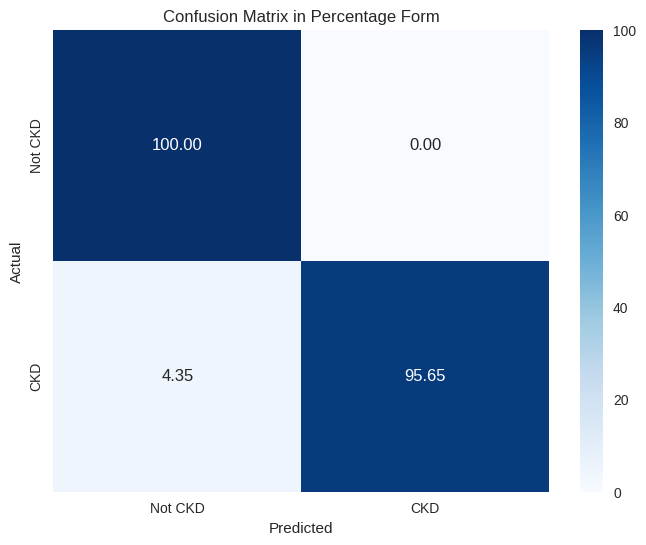

In [231]:
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

Extra Trees Classifier

In [232]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = et_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Extra Trees Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Extra Trees Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1-Score: 0.97
ROC AUC: 0.97
Confusion Matrix:
 [[54  0]
 [ 3 43]]


Confusion matrix in percentage

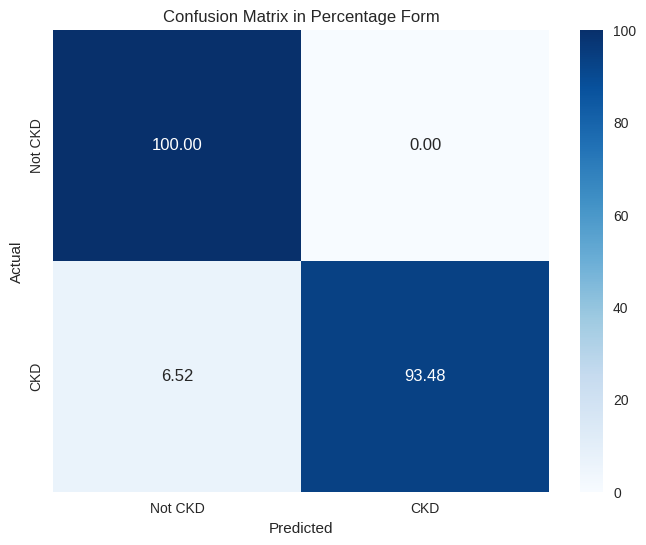

In [233]:
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

Logistic regression(to show that precision varies)

In [234]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Accuracy: 0.97
Precision: 0.98
Recall: 0.96
F1-Score: 0.97
ROC AUC: 0.97
Confusion Matrix:
 [[53  1]
 [ 2 44]]


Confusion matrix in percentage

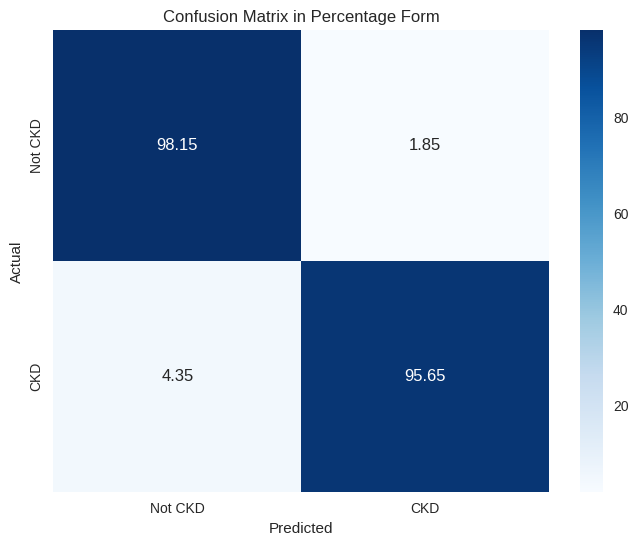

In [235]:
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix in Percentage Form')
plt.show()

Viewing the most influencing attribute

In [236]:
X = resampled_ckd.drop('classification', axis=1)
y = resampled_ckd['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Attribute': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
N = 5
print(feature_importance_df.head(N))

   Attribute  Importance
2         sg    0.235642
13      hemo    0.225483
10        sc    0.136241
3         al    0.133399
15       htn    0.074941
